<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
Recherche du meilleur algorithme de segmentation
</h1>

# Sommaire

1. Clustering avec l'algorithme du K-Means
2. Réduction dimensionnelle - PCA
3. K-Means après réduction de dimenssions
4. Stabilité à l'initialisation du K-Means
5. Clustering avec l'algorithme du K-Prototypes
6. Stabilité temporelle de la segmentation
7. Clustering avec DBSCAN
8. Herarchiqual clustering selon Ward

In [ ]:
pip install kmodes

In [ ]:
# Librairies standards
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
import os
from time import time
import warnings

# librariries sklearn pour le clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes
from threadpoolctl import threadpool_limits

# Configuration de la taille par défaut des figures de matplotlib
mpl.rcParams["figure.figsize"] = (12, 8)
# Activation du mode NoteBook
init_notebook_mode()
# Désactivation des avertissements non-pertinents
warnings.filterwarnings('ignore')
# Connexion au Drive : Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importation de la base de données dans Google Collab
# Importation à partir du Drive
data_dir = '/content/drive/My Drive/Colab Notebooks/'
data = pd.read_csv(data_dir + 'olist_base_finale.csv',index_col=0)

In [ ]:
data.head(5)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,Flag and name,harvesine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,0.0,...,1.0,1.0,111.0,0.08,129.90,7787,cajamar,São Paulo,São Paulo,209.713834
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,0.0,...,1.0,1.0,114.0,0.30,18.90,6053,osasco,São Paulo,São Paulo,209.713834
0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,0.0,...,1.0,1.0,537.0,0.20,69.00,88115,sao jose,Santa Catarina,Santa Catarina,125.363853
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,0.0,...,1.0,1.0,321.0,0.40,25.99,66812,belem,Pará,Pará,1574.231129
0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,0.0,...,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,São Paulo,São Paulo,209.713834


In [ ]:
data.shape

(93358, 27)

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
Preprocessing
</h1>

Nous allons supprimer customer_zip_code_prefix et customer_city, customer_state pour ne conserver que la variable haversine_distance pour indiquer une localisation "large" des clients, ce qui évitera de focaliser la segmentation sur la localisation du client.

Nous allons également supprimer mean_price_order et mean_nb_items puisque nous avons vu dans le Notebook de nettoyage et exploration Olist que ces variables sont fortement corrélées aux totaux pour le moment.

In [ ]:
data.drop(["customer_zip_code_prefix",
           "customer_city",
           "customer_state",
           "Flag and name",
           "mean_price_order",
           "mean_nb_items"], axis=1, inplace=True)

In [ ]:
# Sélection des variables catégorielles
var_categorical = list(data.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
var_categorical

[]

**NB :**  
Aucune variable catégorielle

In [ ]:
# Sélection des variables numériques
var_numeric = list(data.select_dtypes(include=['int64','float64', 'uint8']).columns)
var_numeric

['nb_orders',
 'total_spend',
 'mean_payment_sequential',
 'mean_payment_installments',
 'mean_review_score',
 'mean_delivery_days',
 'favorite_sale_month',
 'books_cds_media',
 'fashion_clothing_accessories',
 'flowers_gifts',
 'groceries_food_drink',
 'health_beauty',
 'home_furniture',
 'other',
 'sport',
 'technology',
 'toys_baby',
 'total_items',
 'order_mean_delay',
 'freight_ratio',
 'harvesine_distance']

On prepare ensuite le preprocessor :

In [ ]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, var_numeric)])

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
Algorithme 1 : KMeans
</h1>

## Etape 1 : détermination du meilleur K

### Méthode 1 de recherche du k : Méthode du coude
KElbowVisualizer de Yellowbrick implémente la méthode du «coude» pour sélectionner le nombre optimal de clusters.
On crée un pipeline pour y inclure le preprocessing et la visualisation de la méthode du coude de notre KMeans.

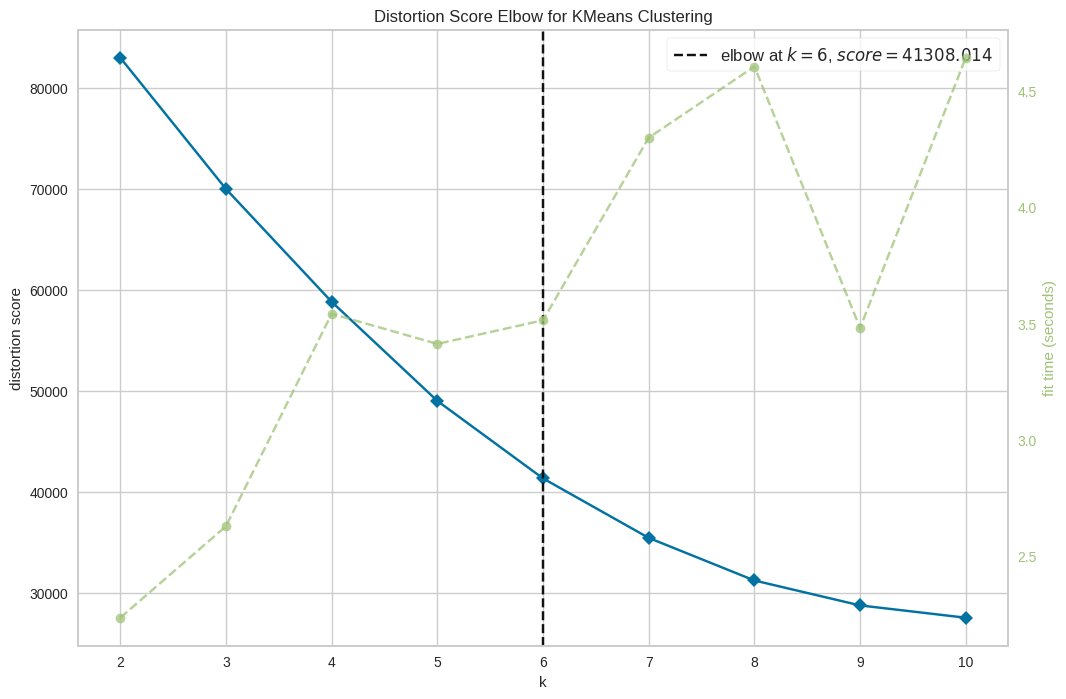

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
data_KM = data.copy()
# La Méthode Elbow
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(data_KM)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

**Note : Meilleur K = 6 clusters selon cette méthode**  
Grâce à la méthode du coude basée sur le score de distortion (somme moyenne des carrés des distances aux centres), une segementation en  K=6 clusters serait la meilleure option.

### Score de silhouette

Vérification si le clustering fonctionne bien avec le K = 6 obtenu précedemment à travers une visualisation de la densité et la séparation des clusters.

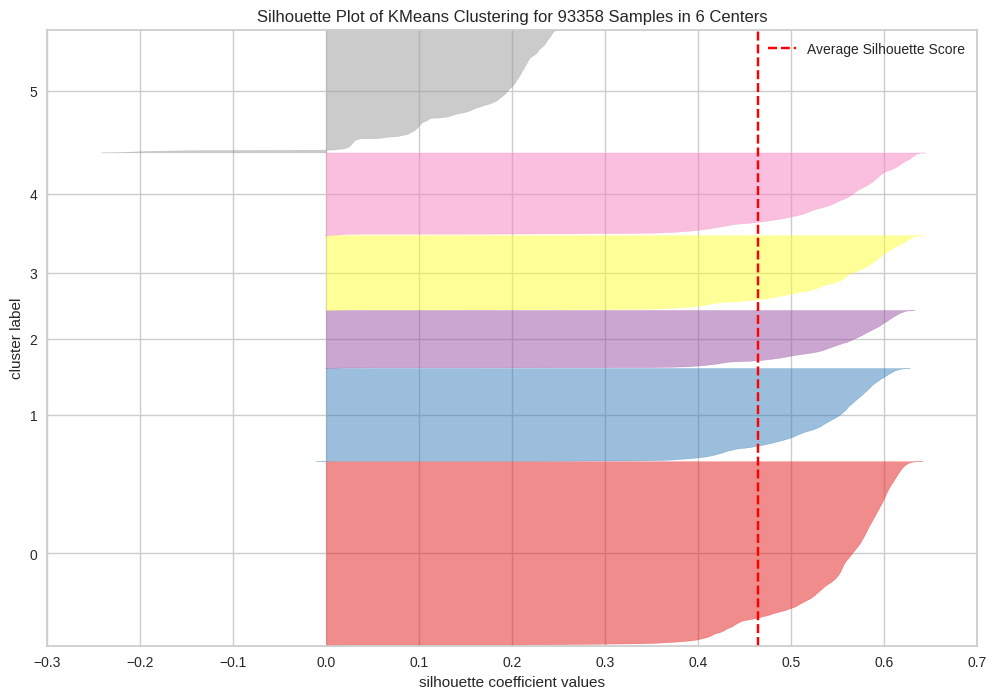

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 93358 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# Recupération du meilleur K avec KElbowVisualizer
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Pipeline Silhouette
silhouette = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette.fit(data_KM)
silhouette.named_steps['silhouettevisualizer'].show()

In [14]:
model = KMeans(n_clusters=K)
labels = model.fit_predict(preprocessor.fit_transform(data_KM))

# Calcul les coefficients Silhouette
silhouette_avg = silhouette_score(preprocessor.fit_transform(data_KM), labels)
silhouette_values = silhouette_samples(preprocessor.fit_transform(data_KM), labels)

#  les coefficients Silhouette
print(f"Score moyen des coefficients Silhouette : {silhouette_avg}")
print(f"Valeurs des coefficients Silhouette pour chaque point : {silhouette_values}")


Score moyen des coefficients Silhouette : 0.4638499897958118
Valeurs des coefficients Silhouette pour chaque point : [0.59604504 0.62106839 0.48456022 ... 0.48363191 0.62152231 0.5678086 ]


**Interprétation :**
Les clusters semblent relativement bien répartis et les séparations sont claires avec cependant quelques erreurs sur l'un des clusters.

### Méthode 2 : Autres metriques: Calinski Harabasz, méthode silhouette.

* Silouhette : rapport moyen entre la distance intra-cluster et la distance du cluster le plus proche,
* Calinski Harabasz : rapport entre la dispersion des grappes dans et entre les groupes.

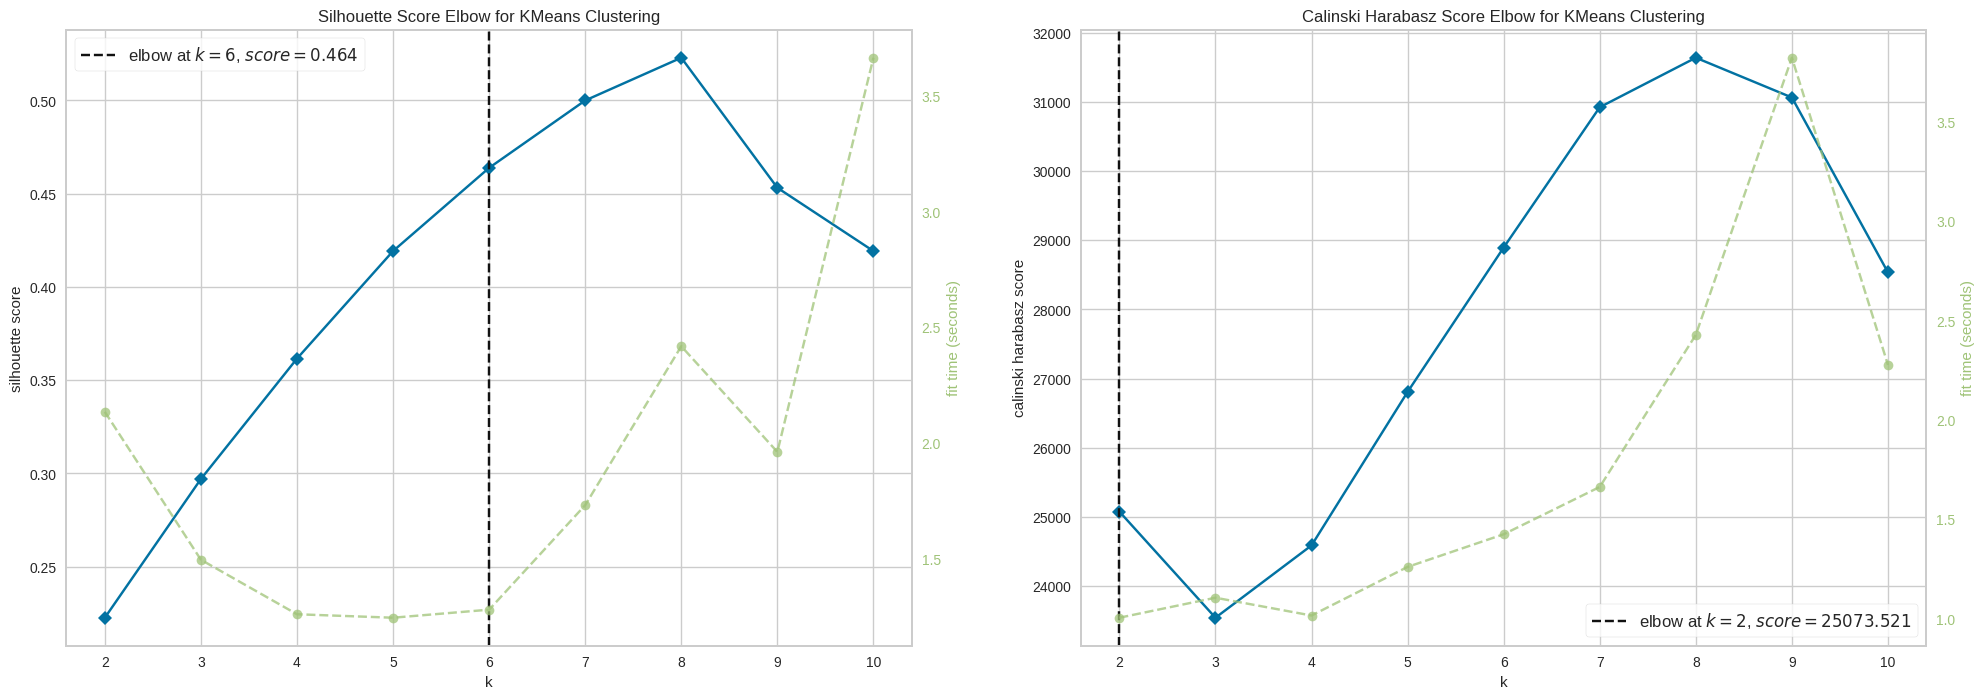

In [ ]:
# Méthode Elbow avec différentes métriques
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K=(4,10),
                                              metric=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(data_KM)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

**Note**  
* Pour la métrique silhouette score, le nombre de clusters = 6.
* Pour le score Calinski Harabasz, le nombre de clusters est incertain (2).   

**Conclusion**  
On retient une répartition en 6 clusters.

### Evaluation du K choisi
Pour savoir, si le K = 6, est le meilleur, nous allons calculer et répresenter les distances entre les clusters en 2 dimensions.

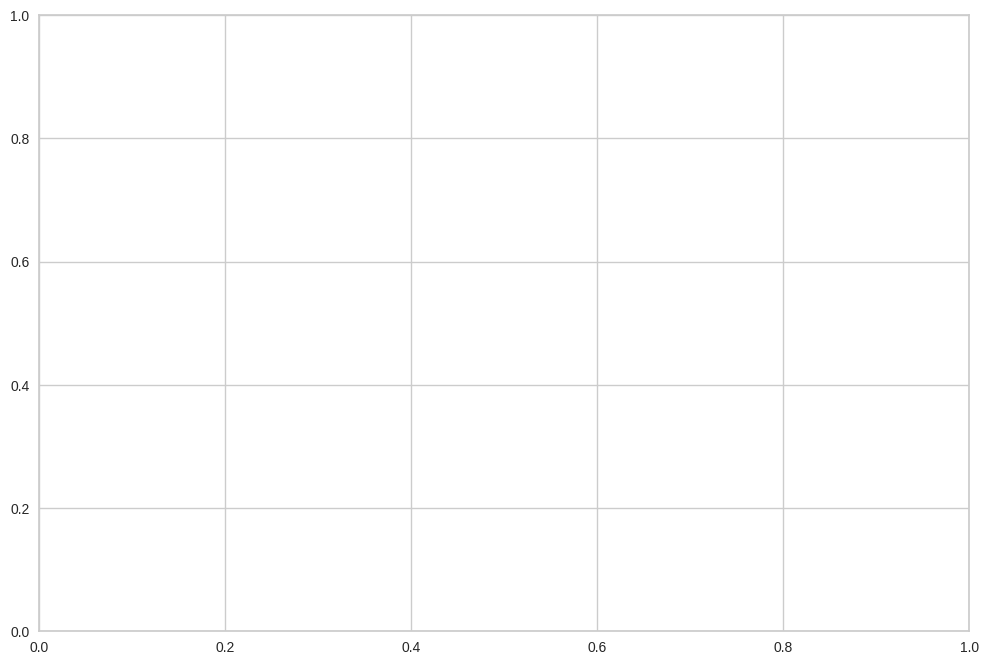

In [15]:
# Distance Intercluster avec K = 6
#Le pipeline
distance_viz = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])

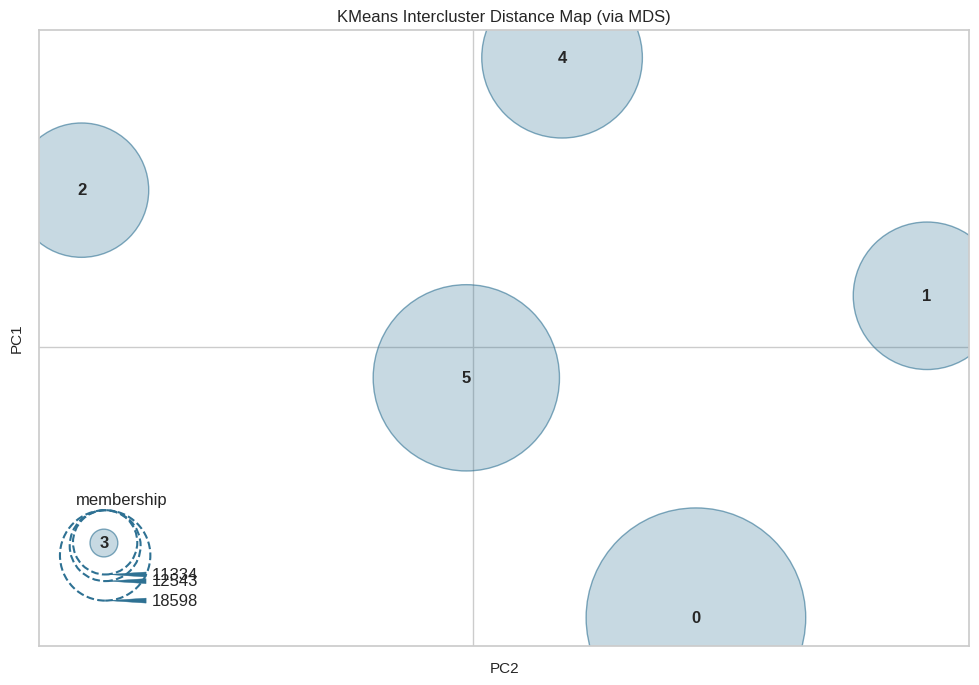

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [16]:
distance_viz.fit(data_KM)
distance_viz.named_steps['distancevisualizer'].show()

**Note :**  
* On remarque que les différents clusters sont bien séparés sur les 2 premières composantes principales. Le clustering semble donc performant et il faut a présent identifier les composantes métier de chaque cluster.

* **2e étape** :  nous allons entrainer notre KMeans avec le K optimal sélectionné et affecter son cluster à chaque client. Ainsi, nous pourrons analyser les différences entre chaque cluster

## Etape 2 : Entrainement du modèle KMeans avec K optimal

### Modèle KMeans 1

In [17]:
# Pipeline KMeans avec K = 6
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['nb_orders', 'total_spend',
                                                   'mean_payment_sequential',
                                                   'mean_payment_installments',
                                                   'mean_review_score',
                                                   'mean_delivery_days',
                                                   'favorite_sale_month',
                                                   'books_cds_media',
                                                   'fashion_clothing_accessories',
                                                   'flowers_gifts',
                                                   'groceries_food_drink',
                                                   'health_beauty',
                                                   'home_furniture', 'other',
                                                   'sport', 'technology',
                                                   'toys_baby', 'total_items',
                                                   'order_mean_delay',
                                                   'freight_ratio',
                                                   'harvesine_distance'])])),
                ('kmeans', KMeans(n_clusters=6))])

In [18]:
kmeans_model.fit(data_KM)

# Libellés des clusters
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
data_KM["kmeans_label"] = kmeans_labels

In [19]:
# Regroupement des individus par cluster pour analyser les moyennes
kmeans_clusters_means = data_KM.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

,kmeans_label,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,order_mean_delay,freight_ratio,harvesine_distance
0,0,1.040838,163.717966,1.055670,3.288653,4.083792,12.973760,6.047525,0.000137,0.000701,...,0.000635,0.993929,0.001447,0.000194,0.001413,0.000563,1.277321,236.946739,0.216116,399.576365
1,1,1.029469,163.668180,1.034314,3.146102,4.247607,12.029954,6.064761,0.000176,0.000588,...,0.993385,0.002669,0.000543,0.000099,0.001191,0.000125,1.127757,222.123753,0.188519,464.416833
2,2,1.029972,178.768177,1.041550,2.841930,4.183342,12.151647,5.862734,0.000199,0.001176,...,0.001761,0.005262,0.987347,0.000127,0.002075,0.000651,1.154962,211.144746,0.204092,434.069037
3,3,1.022523,221.473093,1.041671,3.637056,4.172832,12.658574,6.270959,0.000114,0.000796,...,0.000758,0.002522,0.000724,0.000061,0.001744,0.000477,1.086225,234.488009,0.140086,485.167505
4,4,1.041402,147.062879,1.040282,2.674505,4.241834,11.910794,6.258415,0.045077,0.167990,...,0.001722,0.004034,0.001990,0.386174,0.001476,0.341953,1.149263,242.500648,0.203657,430.809405
5,5,1.021237,145.961860,1.036340,2.258790,4.096225,13.086473,5.696729,0.000035,0.000675,...,0.000348,0.001643,0.000377,0.000018,0.996158,0.000094,1.152768,236.597214,0.259948,471.921400


In [20]:
# Regroupement dans les clusters après standardisation des donnees (MinMax_Scalar)
df_scaled = preprocessor.fit_transform(data_KM)
df_scaled = pd.DataFrame(df_scaled, index=data.index, columns=data.columns)
df_scaled["kmeans_label"] = kmeans_labels
df_scaled_clusters = df_scaled.groupby("kmeans_label").mean()
df_scaled_clusters

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,order_mean_delay,freight_ratio,harvesine_distance
kmeans_label,,,,,,,,,,,,,,,,,,,,,
0,0.002917,0.011288,0.002227,0.126487,0.770948,0.057291,0.458866,0.000137,0.000701,0.000822,...,0.000635,0.993929,0.001447,0.000194,0.001413,0.000563,0.012057,0.332324,0.225121,0.147070
1,0.002105,0.011284,0.001373,0.121004,0.811902,0.052775,0.460433,0.000176,0.000588,0.000618,...,0.993385,0.002669,0.000543,0.000099,0.001191,0.000125,0.005555,0.311534,0.196374,0.179838
2,0.002141,0.012390,0.001662,0.109305,0.795835,0.053357,0.442067,0.000199,0.001176,0.001287,...,0.001761,0.005262,0.987347,0.000127,0.002075,0.000651,0.006737,0.296136,0.212596,0.164501
3,0.001609,0.015517,0.001667,0.139887,0.793208,0.055783,0.479178,0.000114,0.000796,0.992781,...,0.000758,0.002522,0.000724,0.000061,0.001744,0.000477,0.003749,0.328875,0.145923,0.190324
4,0.002957,0.010068,0.001611,0.102866,0.810459,0.052205,0.478038,0.045077,0.167990,0.001853,...,0.001722,0.004034,0.001990,0.386174,0.001476,0.341953,0.006490,0.340113,0.212143,0.162854
5,0.001517,0.009987,0.001454,0.086877,0.774056,0.057830,0.426975,0.000035,0.000675,0.000427,...,0.000348,0.001643,0.000377,0.000018,0.996158,0.000094,0.006642,0.331833,0.270780,0.183630


In [92]:
import plotly.io as pio

# Configuration pour l'affichage dans Google Colab
pio.renderers.default = 'colab'

kmeans = KMeans(n_clusters=K)
df_scaled_clusters['kmeans_label'] = kmeans.fit_predict(df_scaled_clusters)

# Normalisation des données
scaler = MinMaxScaler()
dataf = pd.DataFrame(scaler.fit_transform(df_scaled_clusters.drop(columns=['kmeans_label'])),
                     index=df_scaled_clusters.index,
                     columns=df_scaled_clusters.drop(columns=['kmeans_label']).columns).reset_index(drop=True)

# Ajout de l'étiquette du cluster
dataf['kmeans_label'] = df_scaled_clusters['kmeans_label'].values

# Création de la figure
fig = go.Figure()

# Ajout des tracés pour chaque cluster
for k in np.unique(dataf["kmeans_label"]):
    cluster_data = dataf[dataf["kmeans_label"] == k].iloc[:, :-1].mean()  # Moyenne pour chaque variable du cluster
    fig.add_trace(go.Scatterpolar(
        r=cluster_data.values,
        theta=cluster_data.index,
        fill='toself',
        name='Cluster ' + str(k)
    ))

# Mise à jour de la mise en page de la figure
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title={
        'text': "Comparaison des moyennes par variable des clusters",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_color="blue",
    title_font_size=18
)

# Affichage de la figure
fig.show()


**Note**  
Le poids des features sur les catégories de produits masque les autres axes de catégorisation, nous allons donc réaliser un nouveau K-Means en supprimant ces variables (nous pourrons ensuite ajouter la valeur la plus fréquente pour chaque groupe)

In [94]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data),
                        index=data.index,
                        columns=data.columns).reset_index()

    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))
    fig.update_layout(
            polar=dict(
            radialaxis=dict(
              visible=True,
              range=[0, 1]
            )),
            showlegend=True,
            title={
                'text': "Comparaison des moyennes par variable des clusters",
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
            title_font_color="blue",
            title_font_size=18)

    fig.show()

### Modele KMeans 2

Nous allons supprimer les variables sur les catégories de produits et refaire le KMeans.

In [23]:
categories = ['books_cds_media',
              'fashion_clothing_accessories',
              'flowers_gifts',
              'groceries_food_drink',
              'health_beauty',
              'home_furniture',
              'other',
              'sport',
              'technology',
              'toys_baby']
data_bis = data.drop(categories, axis=1)
data_bis.head(5)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,total_items,order_mean_delay,freight_ratio,harvesine_distance
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,1.0,111.0,0.08,209.713834
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,1.0,114.0,0.30,209.713834
0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,1.0,537.0,0.20,125.363853
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,1.0,321.0,0.40,1574.231129
0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,1.0,288.0,0.09,209.713834


In [24]:
# Fonction qui cherche le meilleur K et represente les distances entre les clusters
def clustering_eval(preprocessor, model, data, metric, elbow=True, mds=False, KBest=None):

    if((elbow==True) & (mds==True)):
        ncols=3
    elif((elbow==False) | (mds==False)):
        ncols=2
    else:
        ncols=1

    fig, axes = plt.subplots(nrows=1, ncols=ncols, sharex=False, sharey=False, figsize=(24,8))

    ax=0
    if(elbow==True):
        # Elbow
        kmeans_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("kelbowvisualizer", KElbowVisualizer(model,K=(4,12), metric=metric, ax=axes[ax]))])
        kmeans_visualizer.fit(data)
        KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
        kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
        ax+=1

    # Definir le meilleur K
    K = KBest
    model.set_params(n_clusters=K)

    # Silhouette
    silhouette_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("silhouettevisualizer", SilhouetteVisualizer(model, ax=axes[ax]))])
    silhouette_visualizer.fit(data)
    silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
    ax+=1

    # Distance InterCluster
    if(mds==True):
        distance_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("distancevisualizer", InterclusterDistance(model, ax=axes[ax]))])
        distance_visualizer.fit(data)
        distance_visualizer.named_steps['distancevisualizer'].finalize()

    return K
    plt.show()

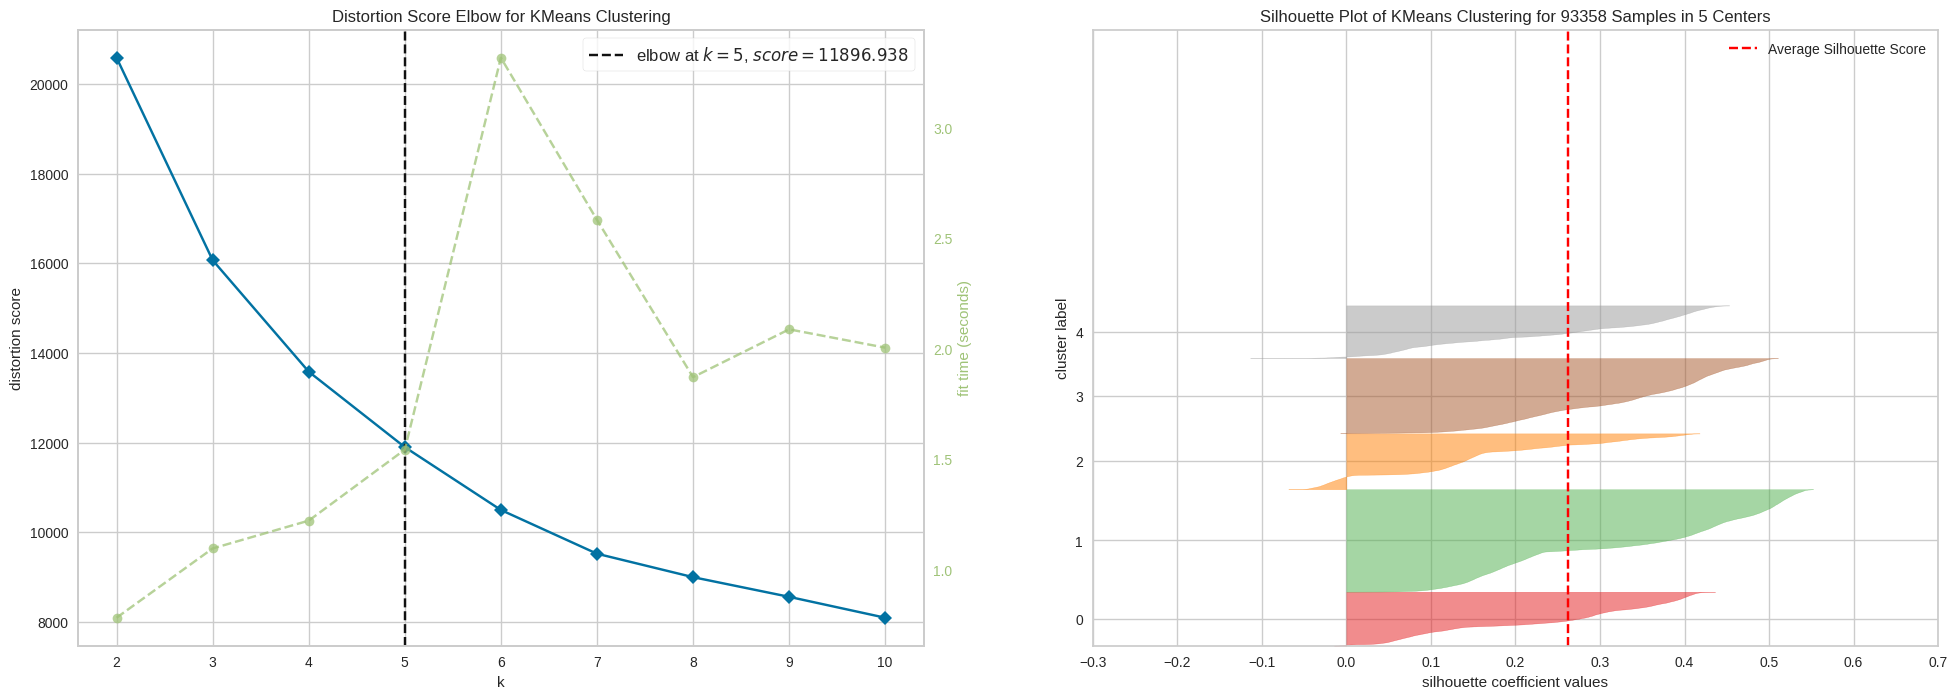

In [25]:
K = clustering_eval(preprocessor=MinMaxScaler(),
                model=KMeans(),
                data=data_bis,
                metric="distortion",
                elbow=True,
                mds=False,
                KBest=None)

**Note**  
Le nombre de clusters optimal est 5

In [26]:
# Pipeline pour le modele KMeans avec le meilleur K
kmeans_model_bis = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_bis

Pipeline(steps=[('preprocessor', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=5))])

In [27]:
kmeans_model_bis.fit(data_bis)

Pipeline(steps=[('preprocessor', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=5))])

In [28]:
# Libellé des clusters
kmeans_labels_bis = kmeans_model_bis.named_steps['kmeans'].labels_

# Standardisation des donnees
scaler = MinMaxScaler()
df_scaled_bis = scaler.fit_transform(data_bis)
df_scaled_bis = pd.DataFrame(df_scaled_bis, index=data_bis.index, columns=data_bis.columns)
df_scaled_bis["kmeans_label"] = kmeans_labels_bis
df_scaled_bis.head(5)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,total_items,order_mean_delay,freight_ratio,harvesine_distance,kmeans_label
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.009690,0.0,0.307692,1.00,0.023923,0.363636,0.0,0.155680,0.083333,0.051121,4
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.001289,0.0,0.038462,0.75,0.009569,0.363636,0.0,0.159888,0.312500,0.051121,4
0000f46a3911fa3c0805444483337064,0.0,0.005612,0.0,0.307692,0.50,0.119617,0.181818,0.0,0.753156,0.208333,0.008493,3
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.002492,0.0,0.153846,0.75,0.090909,0.818182,0.0,0.450210,0.416667,0.740695,1
0004aac84e0df4da2b147fca70cf8255,0.0,0.013717,0.0,0.230769,1.00,0.057416,0.909091,0.0,0.403927,0.093750,0.051121,1


In [29]:
# Regroupement par cluster
df_scaled_clusters_bis = df_scaled_bis.groupby("kmeans_label").mean()
df_scaled_clusters_bis

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,total_items,order_mean_delay,freight_ratio,harvesine_distance
kmeans_label,,,,,,,,,,,
0,0.002701,0.010787,0.001593,0.104805,0.887948,0.056199,0.136211,0.006739,0.247233,0.214399,0.157189
1,0.001143,0.010901,0.001726,0.116606,0.893850,0.054155,0.837446,0.005896,0.436223,0.211501,0.169876
2,0.001902,0.013442,0.001880,0.124040,0.063982,0.091883,0.436945,0.015221,0.324507,0.222145,0.191691
3,0.000010,0.010839,0.002377,0.122657,0.893268,0.051710,0.341411,0.004911,0.669090,0.219149,0.172202
4,0.004990,0.011731,0.001477,0.110094,0.906701,0.038307,0.502253,0.008763,0.083523,0.219804,0.154323


In [97]:
# Representation graphique
plot_radars(data=df_scaled_clusters_bis,
            group="kmeans_label")

## Interprétation des clusters à partir du graphique précedent

* **Groupe 1** (Cluster 0): Clients proches géographiquement  avec de courts délais de livraison, commandant principalement en début d'année pour des montants faibles. Ils paient avec 1 type de moyen de paiement et avec un nombre faible d'échéances. Les avis de ces clients sont très bons.


* Groupe 2 (Cluster 1): Clients de fin d'année. Ils règlent avec plusieurs moyens de paiement pour des montants faibles. Ces clients sont géographiquement peu éloignés(distance haverstine faible) et les délais de livraison sont courts. Les avis de ces clients sont également très bons.

* Groupe 3  (Cluster 3): Regroupe les clients qui utilisent plusieurs moyens de paiement et un nombre important d'échéances. Ils ont tendence à espacer les délais entre 2 commandes. Les avis de ces clients sont également très bons.

* Groupe 4 (Cluster 2): Ce sont des clients mécontents (les avis sont mauvais). Les délais de livraison sont très importants et les frais de port élevés en raison de l'éloignement géographique. Ce sont cependant les clients qui ont le plus dépensé et ont acheté un grand nombre d'articles. En revanche, le nombre de commandes passées sur le site est moyen.

* Groupe 5 (Cluster 4): Ces clients ont passé un nombre important de commandes et sont satisfaits. ils paient comptant pour un montant moyen de commande. Ils sont géographiquement proches.

Nous allons à présent réaliser une réduction dimensionnelle pour vérifier si le clustering est réalisable sur un nombre réduit de variables sans perturber les groupes

# Algorithme 2 : Réduction de dimension (ACP)

Objectif de l'ACP : Catégoriser les clients avec le moins de variables. Reduire les variables et faire du clustering sans perturber les groupes

In [31]:
# Pipeline ACP
acp = Pipeline([("preprocessor", MinMaxScaler()),
                ("acp", PCA(svd_solver='full'))])
acp

Pipeline(steps=[('preprocessor', MinMaxScaler()),
                ('acp', PCA(svd_solver='full'))])

In [32]:
acp.fit(data_bis)
data_projected = acp.transform(data_bis)

### Etape 1 : Nombre d'axes à retenir

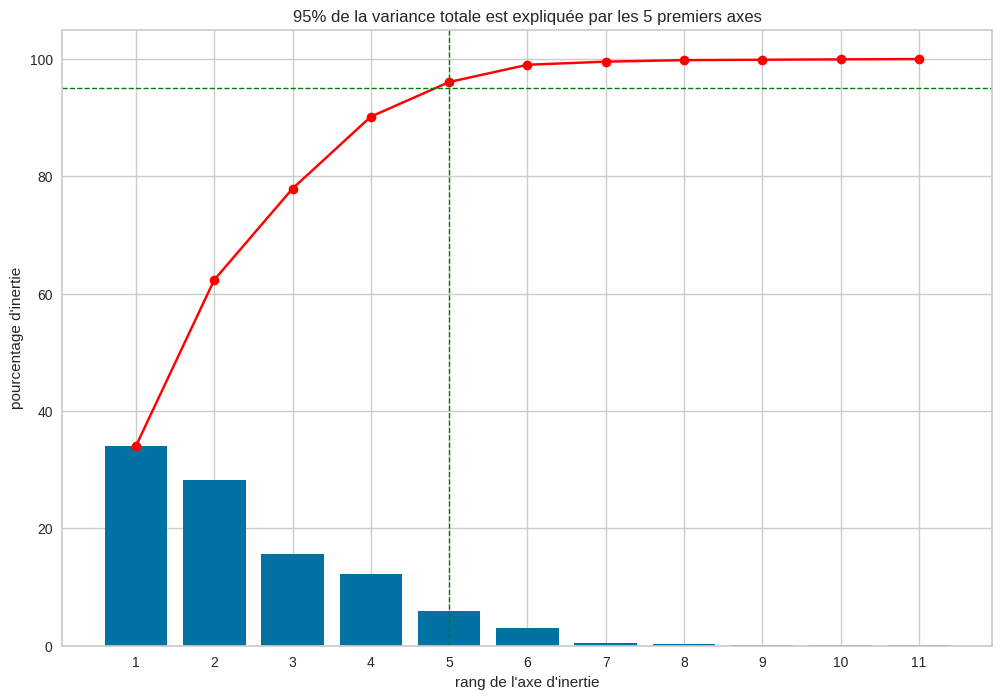

In [33]:
# Variance Expliquée
varexpl = acp.named_steps['acp'].explained_variance_ratio_*100

# representation
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--",
            color="green",
            linewidth=1)
limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--",
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

**Note :**  
* 95% de la variance totale est expliquée par les 5 premiers axes;
* On retient 5 axes principaux

### Etape 2 : Cercle des corrélations

In [34]:
def cerle_corr(pcs, n_comp, pca, axis_ranks,
               labels=None, label_rotation=0):

    fig=plt.figure(figsize=(20,n_comp*5))
    count=1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            #fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=plt.subplot(int(n_comp/2),2,count)
            ax.set_aspect('equal', adjustable='box')

            #détermination des limites du graphique
            ax.set_xlim(-1,1)
            ax.set_ylim(-1,1)

            #affichage des flèches
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:],
                       angles='xy', scale_units='xy', scale=1,
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                ax.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8)

            #ajouter les axes
            ax.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--')
            ax.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')
            #ajouter un cercle
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False)
            ax.add_artist(cercle)

            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1,
                                          round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1,
                                          round(100*pca.explained_variance_ratio_[d2],1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            count+=1

    plt.suptitle("Cercles des corrélations sur les {} premiers axes".format(n_comp),
                 y=.9, color="blue", fontsize=18)
    plt.show(block=False)


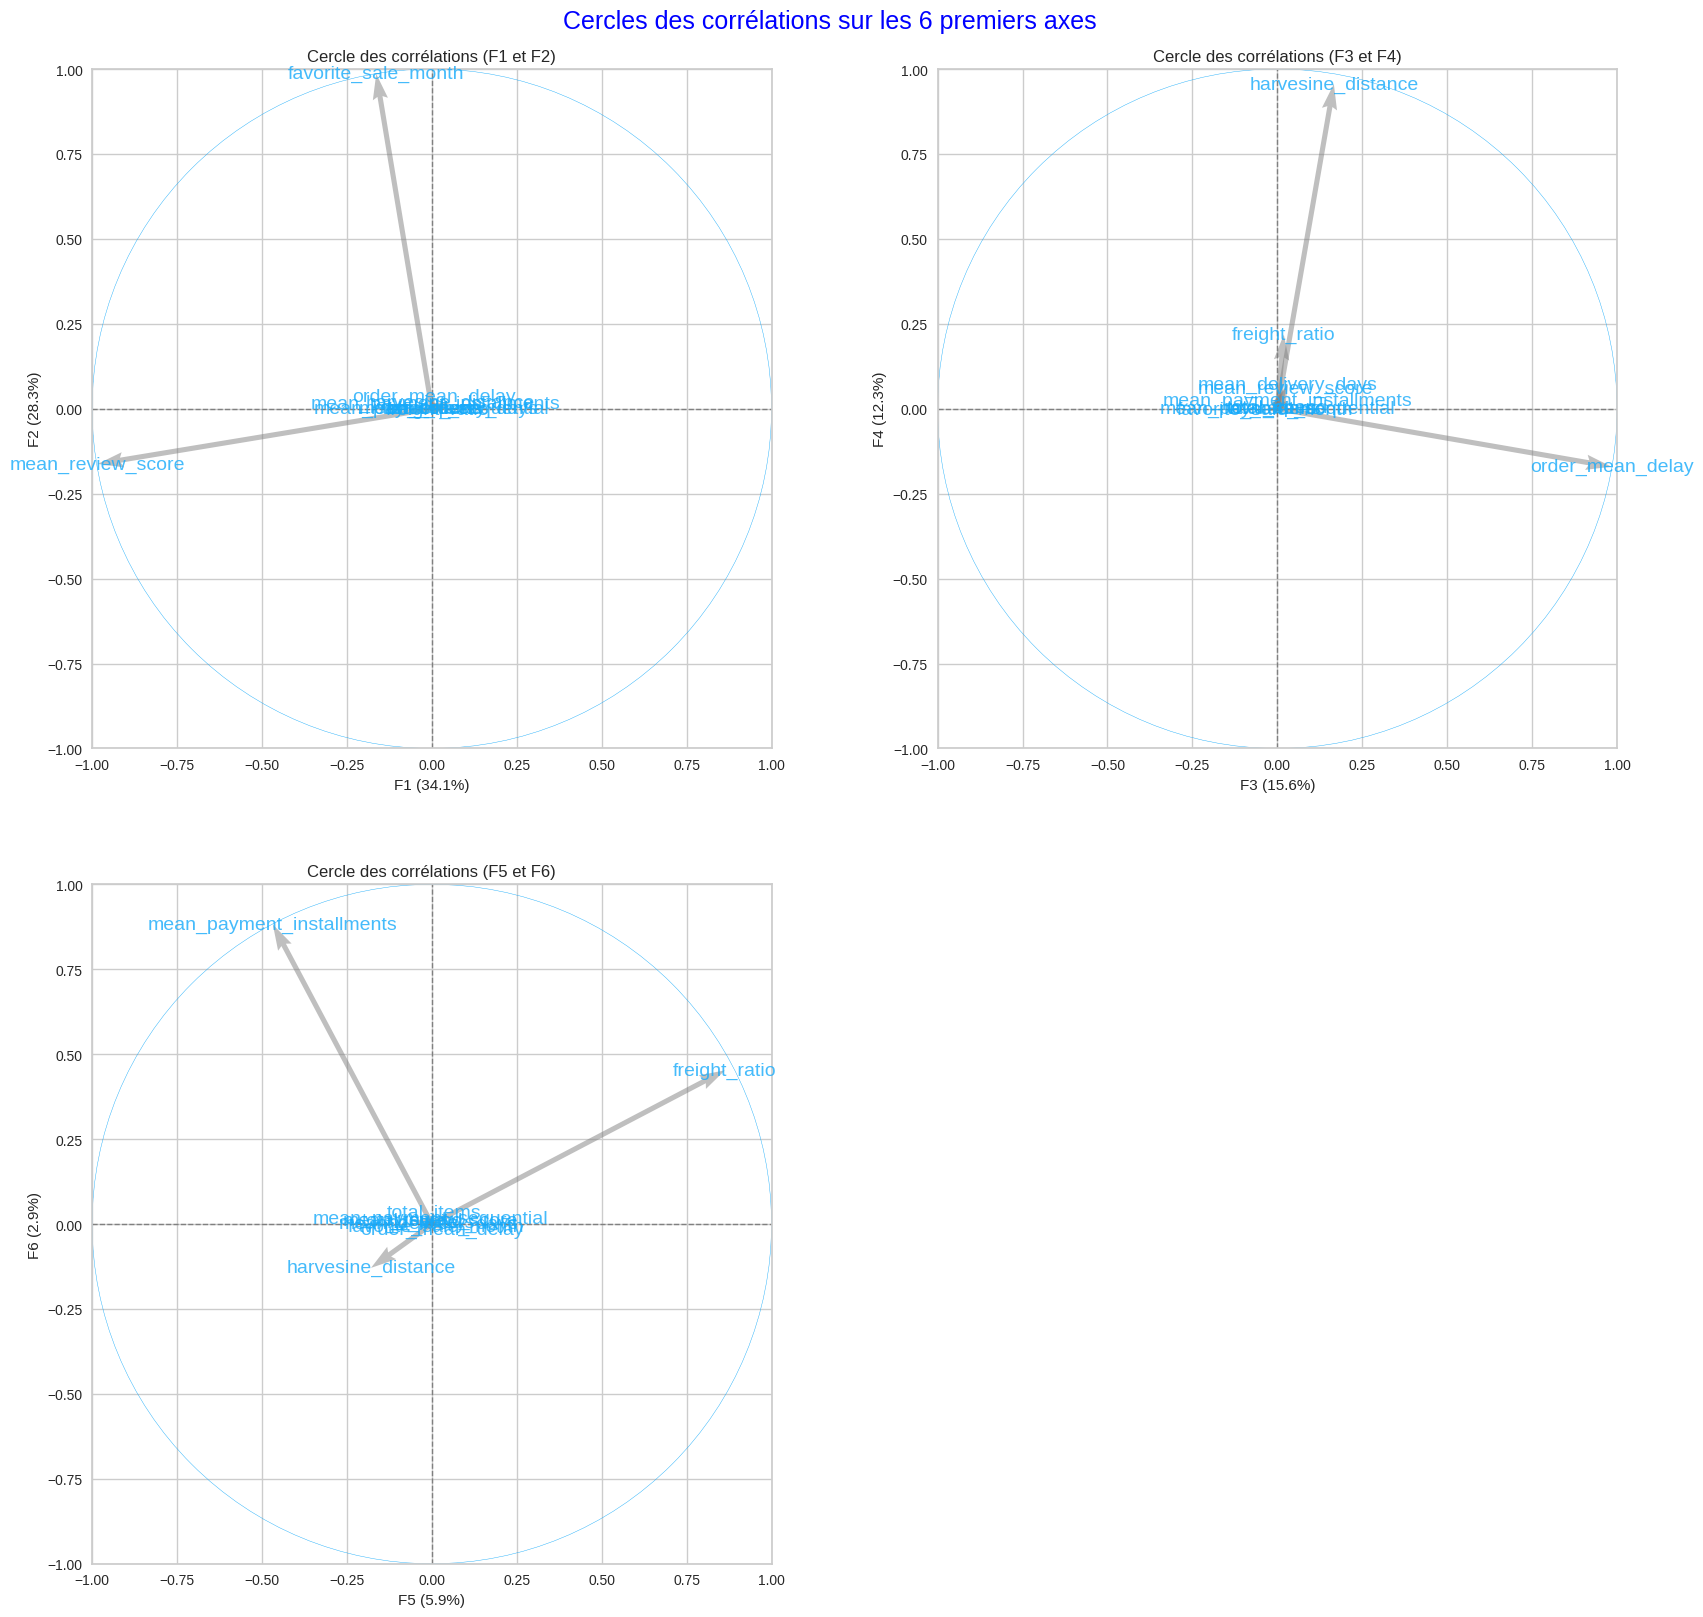

In [35]:
pcs = acp.named_steps['acp'].components_

# Cercle de corrélation
cerle_corr(pcs,
           6,
           acp.named_steps['acp'],
           [(0,1),(2,3),(4,5)],
           labels = np.array(data_bis.columns))

**Note**  
En analysant les variables qui contribuent à chaque axe, on retient :
* la variable synthétique F2 représentera les périodes d'achats.
* La variable synthétique F4 quant à elle représente l'aspect géographique.

**Conclusion** : On va intégrer ces résultats à l'alogo KMeans

# Algorithme 3 : K-Means après réduction de dimenssions

In [36]:
# Pipeline KMeans avec le K optimal sur les résultats de l'ACP
kmeans_model_pca = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_pca.fit(data_projected[:,:4])

# Libellés des clusters
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_
df_scaled_bis["kmeans_label_pca"] = pca_kmeans_labels
df_scaled_clusters_pca = df_scaled_bis.groupby("kmeans_label_pca").mean()
df_scaled_clusters_pca.iloc[:,:-1]

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,total_items,order_mean_delay,freight_ratio,harvesine_distance
kmeans_label_pca,,,,,,,,,,,
0,0.001060,0.010883,0.001722,0.116640,0.893876,0.054130,0.837355,0.005834,0.436559,0.211556,0.169869
1,0.000010,0.010842,0.002377,0.122650,0.893297,0.051754,0.341541,0.004910,0.669173,0.219145,0.172359
2,0.001877,0.013437,0.001880,0.124022,0.064101,0.091893,0.436956,0.015211,0.324539,0.222216,0.191907
3,0.002689,0.010787,0.001593,0.104827,0.887974,0.056195,0.136158,0.006715,0.247261,0.214391,0.157179
4,0.005087,0.011748,0.001481,0.110059,0.906630,0.038315,0.502660,0.008846,0.083435,0.219717,0.154142


In [98]:
plot_radars(data=df_scaled_clusters_pca.iloc[:,:-1],
            group="kmeans_label_pca")

**Note**  
Les Clusters ont les mêmes caractéristiques que le modele KMeans 2

5

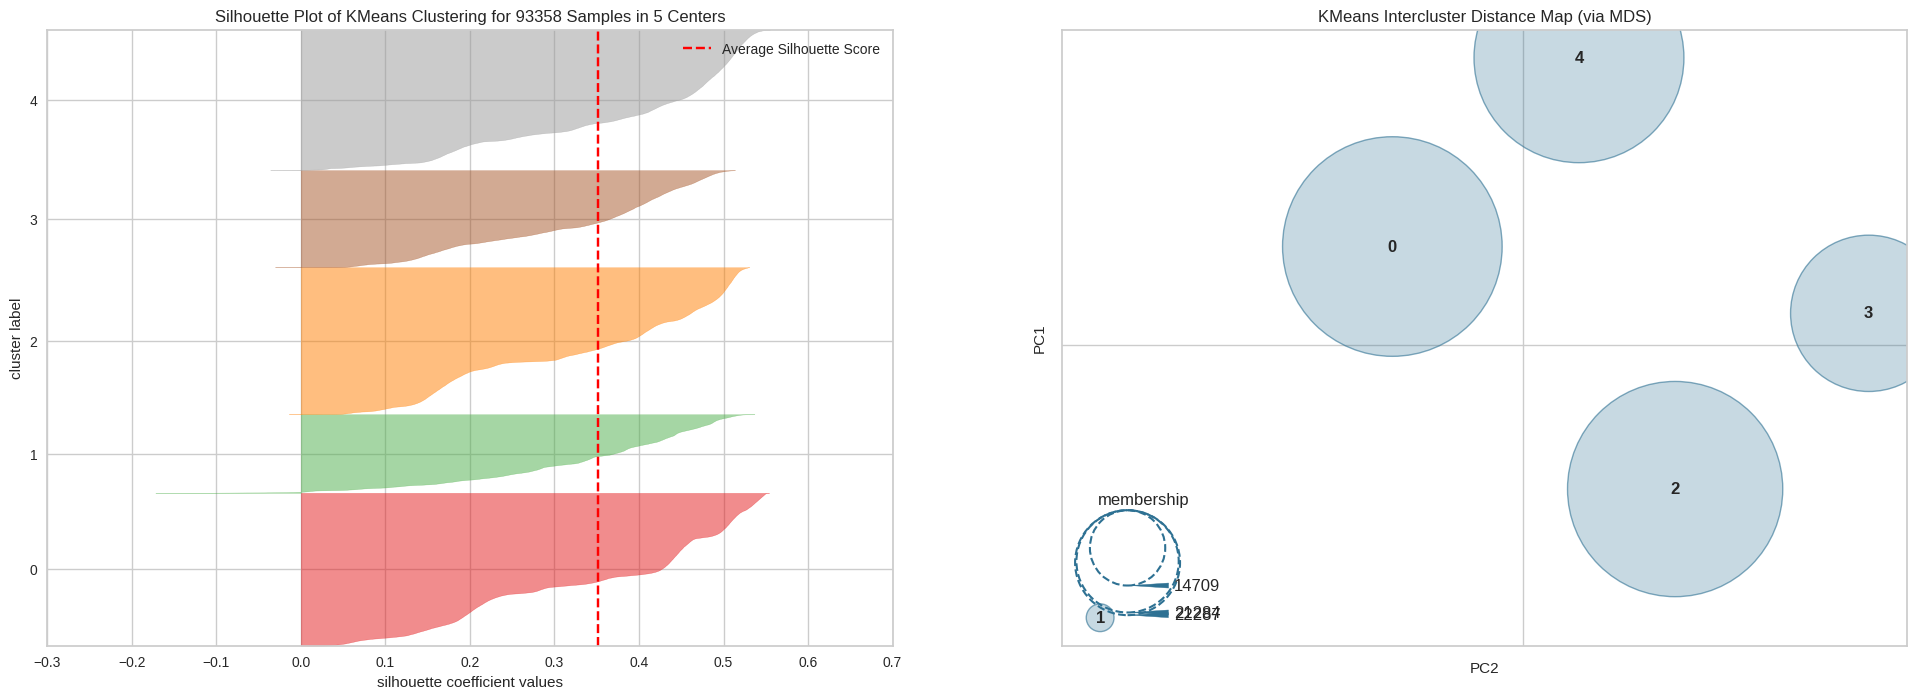

In [38]:
# Fonction qui cherche le meilleur K et represente les distances entre les clusters
clustering_eval(preprocessor=MinMaxScaler(),
                model=KMeans(),
                data=data_projected[:,:4],
                metric="distortion",
                elbow=False,
                mds=True,
                KBest=K)

**Note :**  
* La réduction de dimenssion offre les mêmes axes de segmentation.
* Il est donc possible de réduire le nombre de features en entrée et d'utiliser les variables synthétiques de la PCA pour segmenter notre fichier client, ce d'autant que les scores silhouette sont ici meilleurs comparés au données brutes.

### Stabilité à l'initialisation du K-Means

Notre algorithme du K-Means testé ici est initialisé avec la méthode K-Means++, ce qui réduit déjà les effets aléatoires de l'initialisation des centroïdes. Cependant, vous allons tester la stabilité à l'initialisation en entrainant plusieurs fois le modèle sans fixer le RandomState.

Pour les labels initiaux, nous allons conserver les clusters calculés dans le dernier modèle (avec PCA) puis les comparer grâce à l'indice de Rand ajusté (ARI) pour chacune des itérations.

In [39]:
labels = pca_kmeans_labels
pca_data = data_projected[:,:4]

In [40]:
def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]

    # Les metrics utilisés pour l'évaluation du clustering
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]

    # Affichage des résultats
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [41]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=K, n_init=1, init="k-means++")
    bench_k_means(model = imodel, name="Iter "+str(i),
                  data=pca_data, labels=labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.218s	6652	0.684	0.607	0.718
Iter 1   	0.238s	6160	1.000	1.000	1.000
Iter 2   	0.237s	6546	0.645	0.588	0.657
Iter 3   	0.268s	6160	1.000	1.000	1.000
Iter 4   	0.206s	6160	0.999	1.000	0.999
Iter 5   	0.179s	6672	0.617	0.566	0.633
Iter 6   	0.169s	6160	1.000	1.000	1.000
Iter 7   	0.188s	6562	0.719	0.631	0.752
Iter 8   	0.166s	6642	0.630	0.582	0.647
Iter 9   	0.173s	6160	1.000	1.000	1.000
_____________________________________________________


**Note :**  
Les différentes itérations montrent des inerties proches, une bonne homogénéité et un score AMI proche de 1. Nous pouvons donc en déduire que la stabilité à l'initialisation du modèle K-Means est bonne

# Algorithme 4 : K-Prototypes

**Note : Les étapes**  
1. Sélection k prototypes initiaux dans l'ensemble de données X. Il doit y en avoir un pour chaque cluster.
2. Allouer chaque objet de X à un cluster dont le prototype est le plus proche de lui. Cette allocation se fait en considérant la mesure de dissimilarité. 3.

Pour cet algorithme traitant les données mixtes, nous allons convertir quelques variables en variables catégorielles (comme les mois d'achat par exemple) pour leur donner plus de sens.

In [42]:
data_ter = data.iloc[:,:-1]
data_ter["favorite_sale_month"] = pd.to_datetime(data_ter["favorite_sale_month"], format='%m').dt.month_name()
data_ter["mean_payment_sequential"] = np.where(data_ter["mean_payment_sequential"] > 1, "Multiple", "Single")
data_ter["mean_payment_installments"] = np.where(data_ter["mean_payment_installments"] > 1, "Multiple", "Single")
data_ter.head(5)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,order_mean_delay,freight_ratio
customer_unique_id,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,Single,Multiple,5.0,6.0,May,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,111.0,0.08
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,Single,Single,4.0,3.0,May,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,114.0,0.30
0000f46a3911fa3c0805444483337064,1,86.22,Single,Multiple,3.0,26.0,March,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,537.0,0.20
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,Single,Multiple,4.0,20.0,October,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,321.0,0.40
0004aac84e0df4da2b147fca70cf8255,1,196.89,Single,Multiple,5.0,13.0,November,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,288.0,0.09


## Preprocessing

In [43]:
for c in data_ter.select_dtypes(exclude="object").columns:
    scaler = MinMaxScaler()
    data_ter[c] = scaler.fit_transform(np.array(data_ter[c]).reshape(-1, 1))

## Mise en oeuvre de l'algo

In [44]:
# Index des variables catégorielles
cat_cols = [data_ter.columns.get_loc(c) for c in data_ter.select_dtypes(include="object").columns]

In [45]:
# Choix du K optimal
cost = []
for num_clusters in list(range(4,9)):
    n_clusters=num_clusters
    kproto = KPrototypes(n_clusters, init='Cao',n_init = 1,verbose=1)
    kproto.fit_predict(data_ter, categorical = cat_cols)
    cost.append(kproto.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11726, ncost: 69072.9355137665
Run: 1, iteration: 2/100, moves: 8313, ncost: 66565.40357567935
Run: 1, iteration: 3/100, moves: 1322, ncost: 66406.2504145053
Run: 1, iteration: 4/100, moves: 8, ncost: 66406.24980279218
Run: 1, iteration: 5/100, moves: 0, ncost: 66406.24980279218
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 16055, ncost: 59846.67543472226
Run: 1, iteration: 2/100, moves: 3900, ncost: 59655.92796428486
Run: 1, iteration: 3/100, moves: 6189, ncost: 58946.308195923375
Run: 1, iteration: 4/100, moves: 5328, ncost: 58401.273212848806
Run: 1, iteration: 5/100, moves: 761, ncost: 58356.66308329

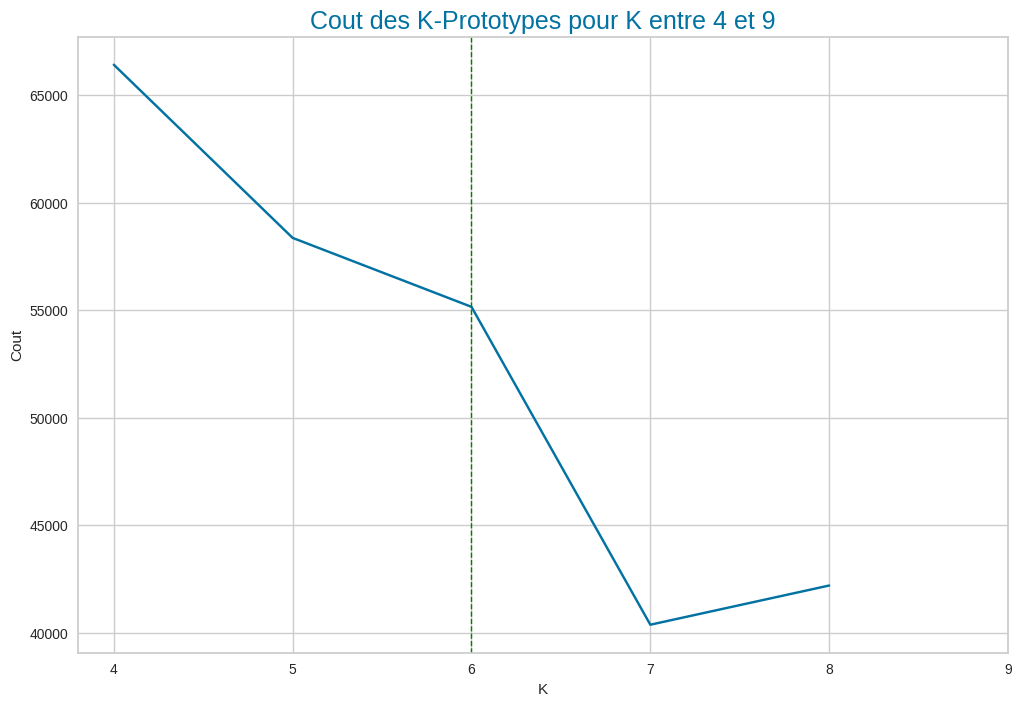

In [46]:
plt.figure(figsize=(12,8))
plt.plot(cost)
plt.xticks(np.arange(0,6,1), np.arange(4,10,1))
plt.axvline(x=2, linestyle="--",
            color="green",
            linewidth=1)
plt.xlabel("K")
plt.ylabel("Cout")
plt.title("Cout des K-Prototypes pour K entre 4 et 9",
          fontsize=18, color="b")
plt.show()

In [47]:
# Initialisation de l'algorithme
kproto = KPrototypes(n_clusters= 6, init='Cao',n_init = 1,verbose=1)
kproto_labels = kproto.fit_predict(data_ter, categorical=cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13555, ncost: 60528.8795792033
Run: 1, iteration: 2/100, moves: 2240, ncost: 60326.87723036075
Run: 1, iteration: 3/100, moves: 164, ncost: 60324.97849703431
Run: 1, iteration: 4/100, moves: 4, ncost: 60324.97679801981
Run: 1, iteration: 5/100, moves: 0, ncost: 60324.97679801981


In [48]:
data["kproto_labels"] = kproto_labels
data.groupby("kproto_labels").mean()

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,order_mean_delay,freight_ratio,harvesine_distance
kproto_labels,,,,,,,,,,,,,,,,,,,,,
0,1.026953,163.007983,1.034766,3.146643,4.242389,12.026864,6.066896,0.000177,0.000589,0.000044,...,0.994170,0.000464,0.000632,0.001336,0.001546,0.000434,1.126370,222.518833,0.188679,464.017554
1,1.038978,158.445457,1.049295,2.948584,4.092051,13.007388,5.929565,0.000124,0.000821,0.000367,...,0.001065,0.660412,0.001898,0.000676,0.333427,0.000960,1.239475,235.962664,0.230555,423.755781
2,1.032226,149.331959,1.035123,2.612227,4.253574,11.965935,6.272542,0.053562,0.001292,0.000445,...,0.000721,0.001468,0.000998,0.468670,0.001742,0.414952,1.137389,238.424343,0.202084,428.691460
3,1.023698,171.528382,1.041173,2.782628,4.731366,10.726466,5.938066,0.000149,0.001197,0.000172,...,0.001270,0.000977,0.992477,0.000640,0.002293,0.000680,1.128946,209.065070,0.203509,423.648333
4,1.031070,197.437601,1.047115,3.433990,4.198653,12.340310,6.242815,0.000083,0.258377,0.731798,...,0.001289,0.002608,0.001515,0.000665,0.001817,0.001831,1.103374,243.426218,0.158959,473.567716
5,1.026305,204.308928,1.041849,3.081639,1.849940,18.088645,5.612993,0.009566,0.002777,0.001760,...,0.003288,0.007958,0.953919,0.002690,0.002963,0.002724,1.262654,224.864289,0.208776,478.740977


**Conclusion :**  
 * Les résultats obtenus sont similaires au K-Means, les catégories produits l'emportent sur les autres variables.
 * Le K-Prototypes ayant un temps d'entrainement et de prédiction plus long, nous conserverons donc la segmentation avec le modèle K-Means.

# Algorithme 5 : CAH



In [49]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_bis)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

In [50]:
# Variance Expliquée
pca = PCA()
pca.fit(X_normalized)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[0.18635923 0.16149594 0.1535954  0.13633546 0.10059762 0.08281968
 0.05372079 0.049804   0.02269752 0.01915835 0.01774664]
[0.18932585 0.16406676 0.15604046 0.13850576 0.10219901 0.08413807
 0.05457597 0.05059682 0.02305883 0.01946333 0.01802915]


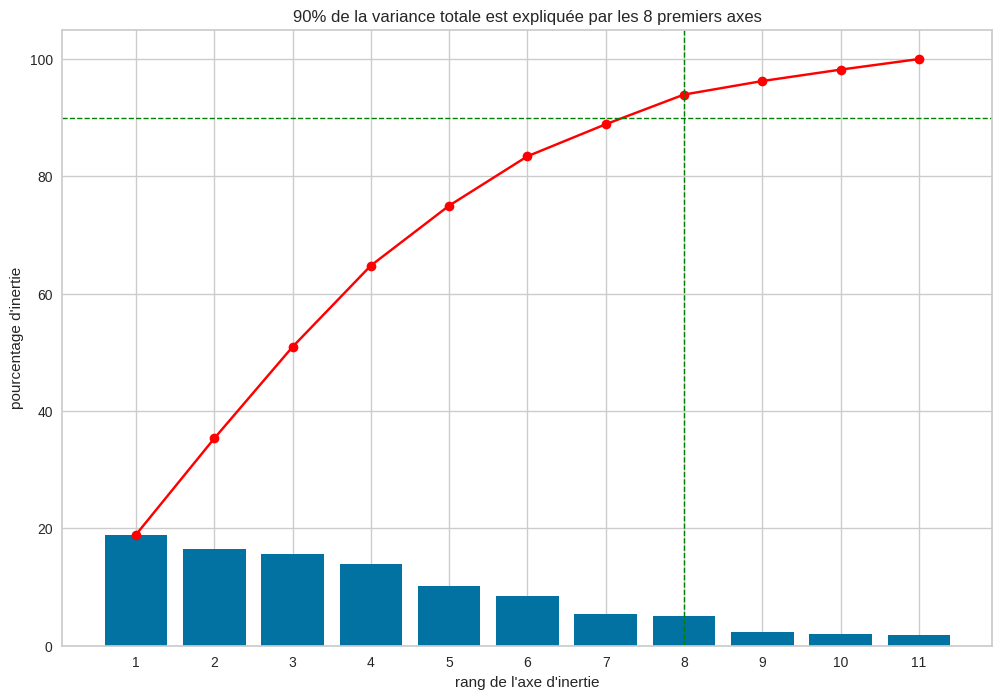

In [51]:
# Variance Expliquée
pca = PCA()
pca.fit(X_normalized)
varexpl = pca.explained_variance_ratio_*100

# Representation de la variance cumulée
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=90, linestyle="--",
            color="green",
            linewidth=1)

limit = 90
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--",
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [52]:
# 4 : Réduire la dimensionnalité des Données

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
 X_train, X_test,  = train_test_split(
                     X_principal,  test_size=0.8, random_state=0)

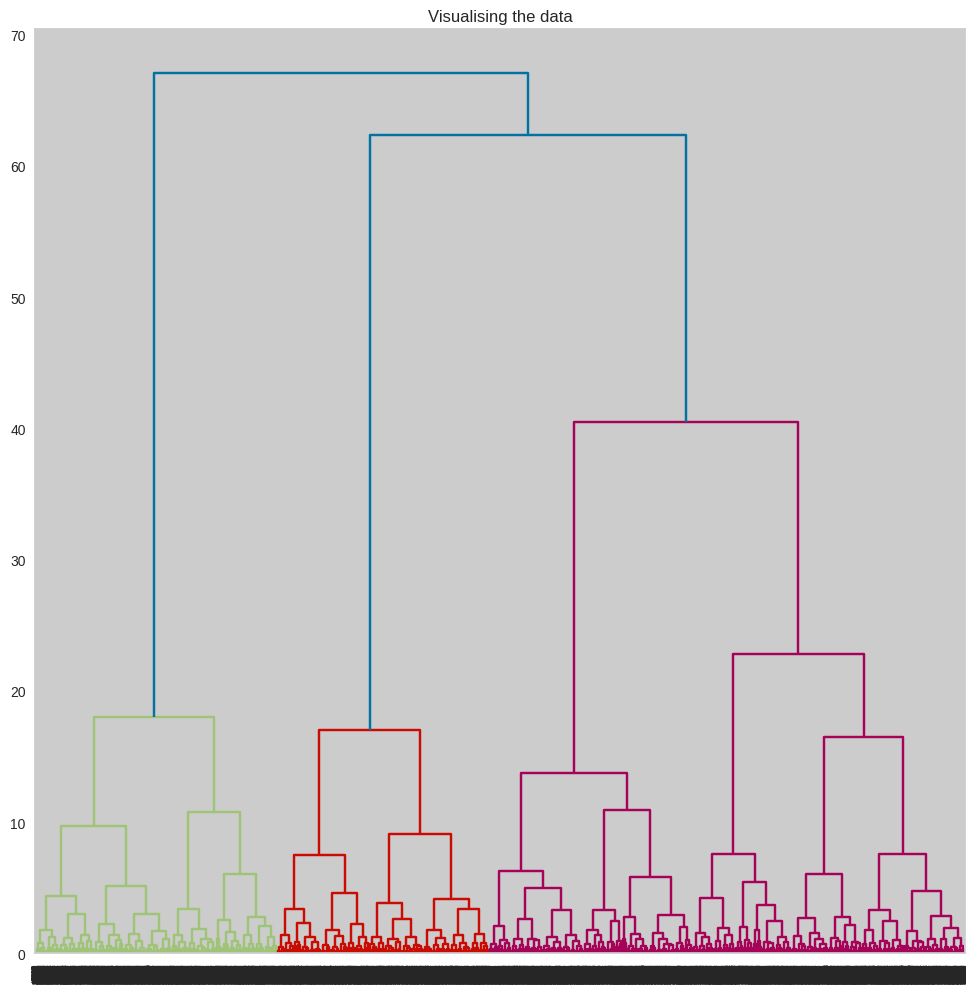

In [55]:
# Dendogrammes

# Etape 5 : Visualisation des dendrogrammes
plt.figure(figsize =(12, 12))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_train, method ='ward')))

In [56]:
 y_train, y_test,  = train_test_split(
                     X_principal,  test_size=0.2, random_state=0)

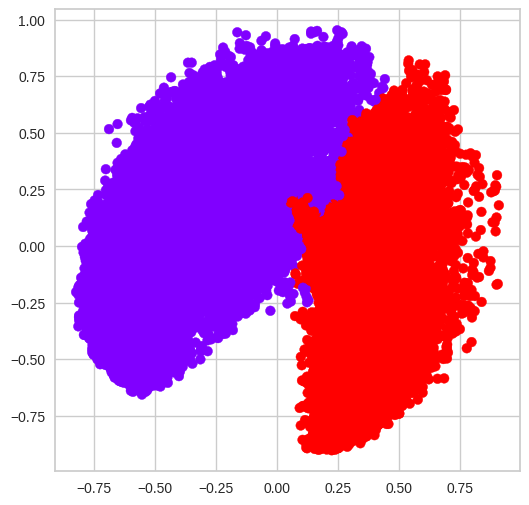

In [57]:
# Etape 6: Construction et Visualisation des différents clustering pour différentes valeurs de k
# k = 2

ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualisation du clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac2.fit_predict(y_test), cmap ='rainbow')
plt.show()

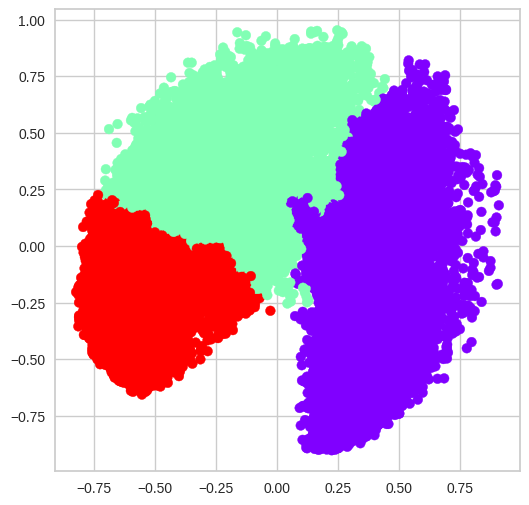

In [58]:
# k = 3

ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac3.fit_predict(y_test), cmap ='rainbow')
plt.show()

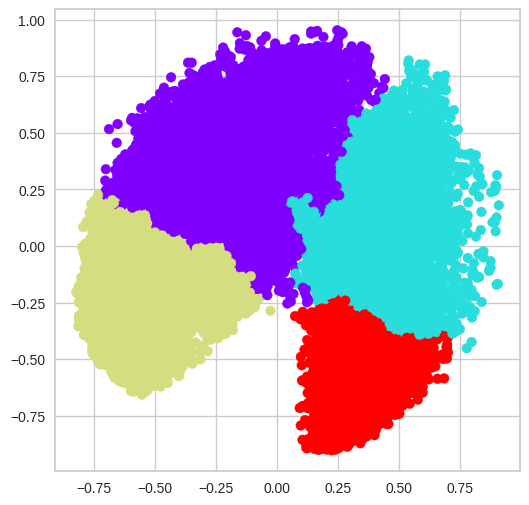

In [59]:
# k = 4

ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac4.fit_predict(y_test), cmap ='rainbow')
plt.show()

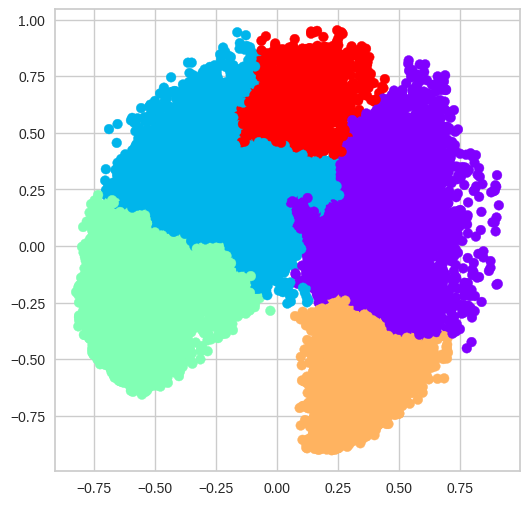

In [60]:
# k = 5

ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac5.fit_predict(y_test), cmap ='rainbow')
plt.show()

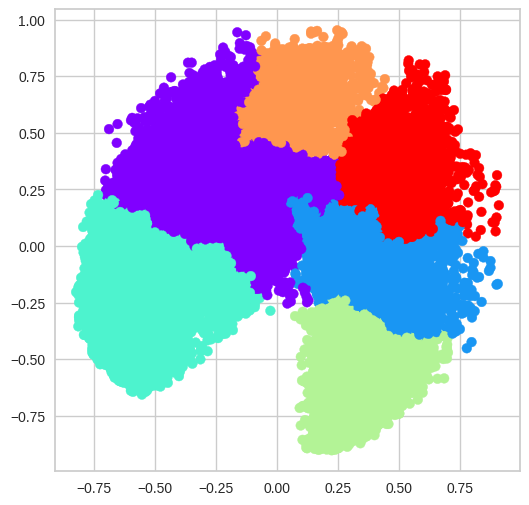

In [61]:
# k = 6

ac6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac6.fit_predict(y_test), cmap ='rainbow')
plt.show()

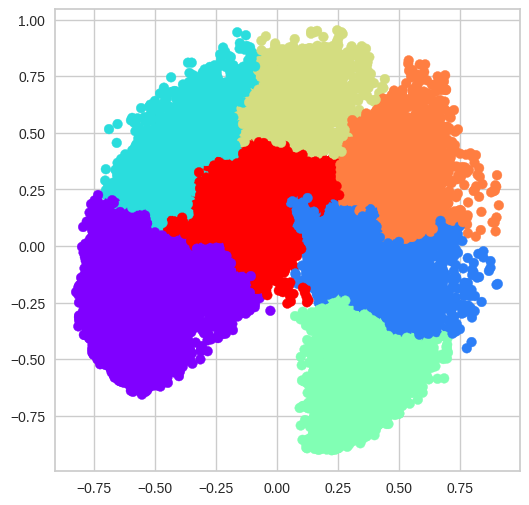

In [62]:
# k = 7

ac7 = AgglomerativeClustering(n_clusters = 7)

plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac7.fit_predict(y_test), cmap ='rainbow')
plt.show()

In [63]:
# Etape 7: Evaluation des différents modèles à l'aide du score silhouette

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(y_test, ac2.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac3.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac4.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac5.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac6.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac7.fit_predict(y_test)))

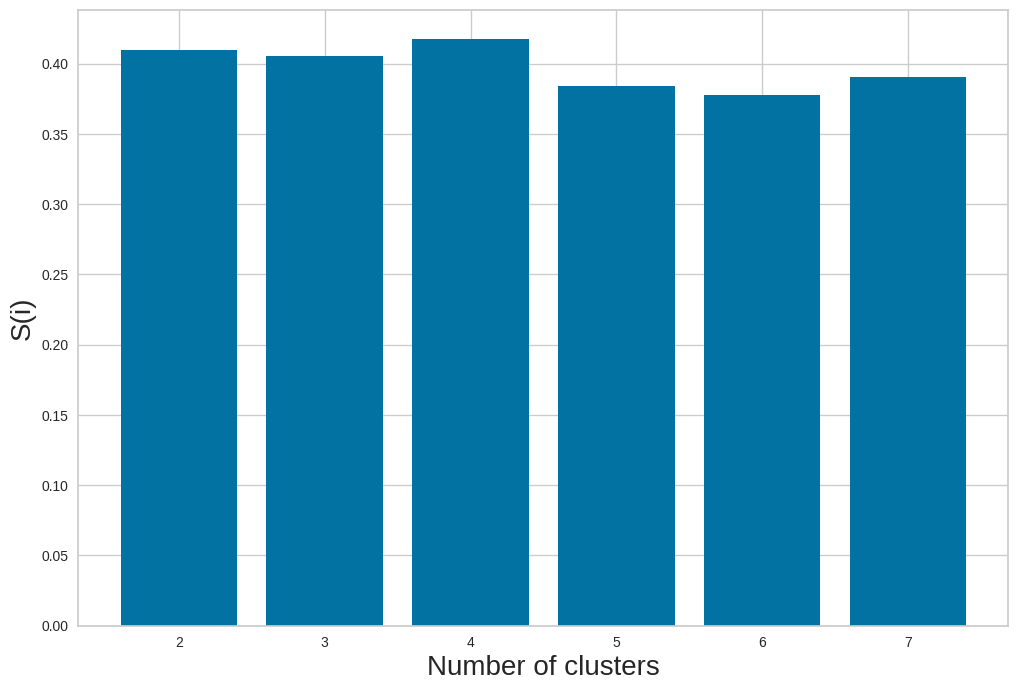

In [64]:
# Comparaison des résultats à l'aide d'un graphe
k = [2, 3, 4, 5, 6, 7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

Nombre optimal de Clustering = 6

In [65]:
Xbis_train,Xbis_test   = train_test_split(
                     X_normalized,  test_size=0.8, random_state=0)

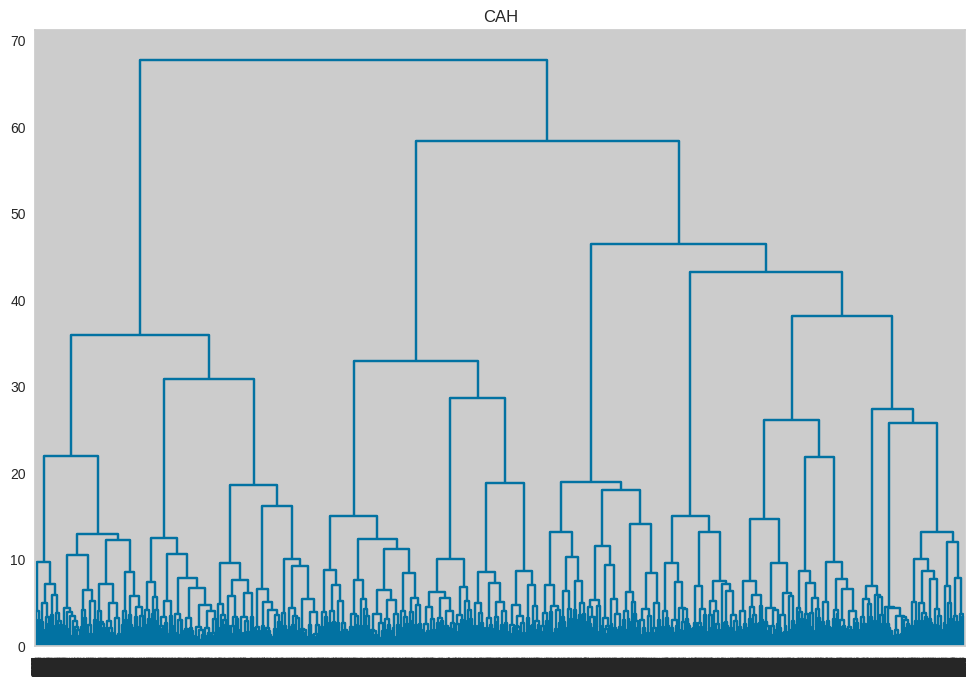

In [66]:
from scipy.cluster.hierarchy import linkage,dendrogram
Z = linkage(Xbis_train,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=0)
plt.show()


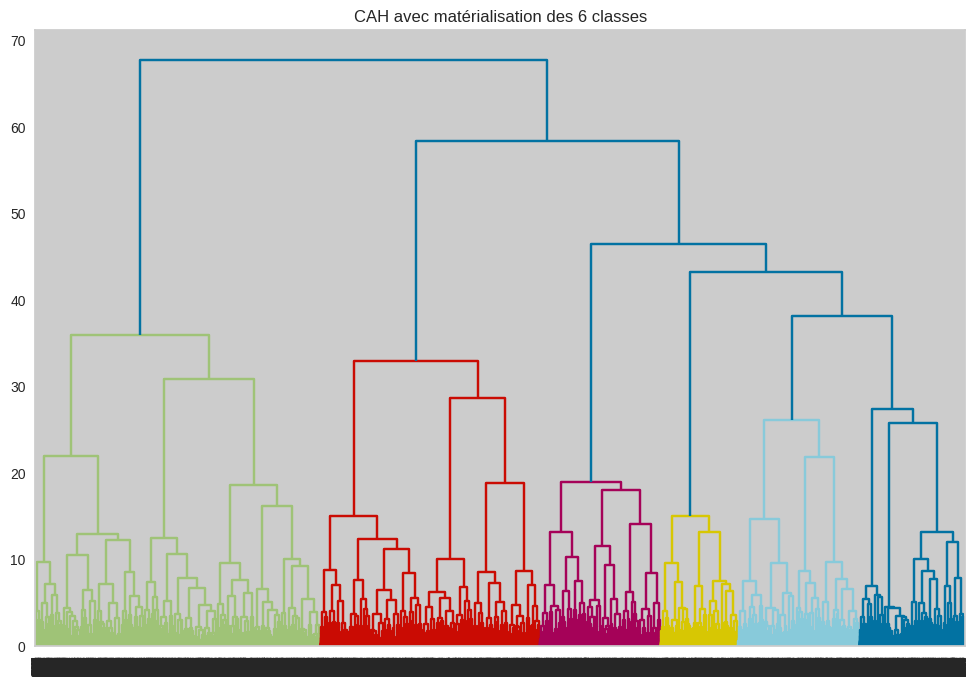

[1 1 6 ... 5 6 2]
        0
1   73744
1   18234
1   65957
1   52870
1   18248
..    ...
6    7361
6   80459
6   43189
6   20318
6   41227

[18671 rows x 1 columns]


In [67]:
from scipy.cluster.hierarchy import ward, fcluster
#matérialisation des 6 classes (hauteur t = 38
plt.title('CAH avec matérialisation des 6 classes')
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=38)
plt.show()
#découpage à la hauteur t = 38==> identifiants de 6 groupes obtenus
groupes_cah = fcluster(Z,t=38,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(X_train.index[idg],groupes_cah[idg]))


In [68]:
Xbis_train = pd.DataFrame(Xbis_train, index=Xbis_train.index, columns=Xbis_train.columns)
Xbis_train_clusters = Xbis_train.mean()
Xbis_train_clusters

0    -0.040368
1    -0.048087
2    -0.028161
3    -0.043380
4     0.045407
5    -0.044704
6     0.004321
7    -0.050278
8    -0.014429
9    -0.015818
10   -0.043251
dtype: float64

# Algorithme 6 : DBSCAN

In [69]:
# Tableau Numpy de toutes les étiquettes de clusters attribuées à chaque point de données
db_default = DBSCAN(eps = 0.025, min_samples = 5).fit(X_principal)
labels = db_default.labels_

In [70]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

In [71]:
# Etape 5: Construction du modèloe de clustering
from sklearn import metrics
labels_true = data.index
# Tableau Numpy de toutes les étiquettes de clusters attribuées à chaque point de données
db_default = DBSCAN(eps = 0.025, min_samples = 5).fit(X_principal)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Nombre de clusters dans les étiquettes, en ignorant le bruit si présent.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 5
Estimated number of noise points: 99
Homogeneity: 0.0009
Completeness: 1.0000
V-measure: 0.0018
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: -0.0000
Silhouette Coefficient: -0.1094


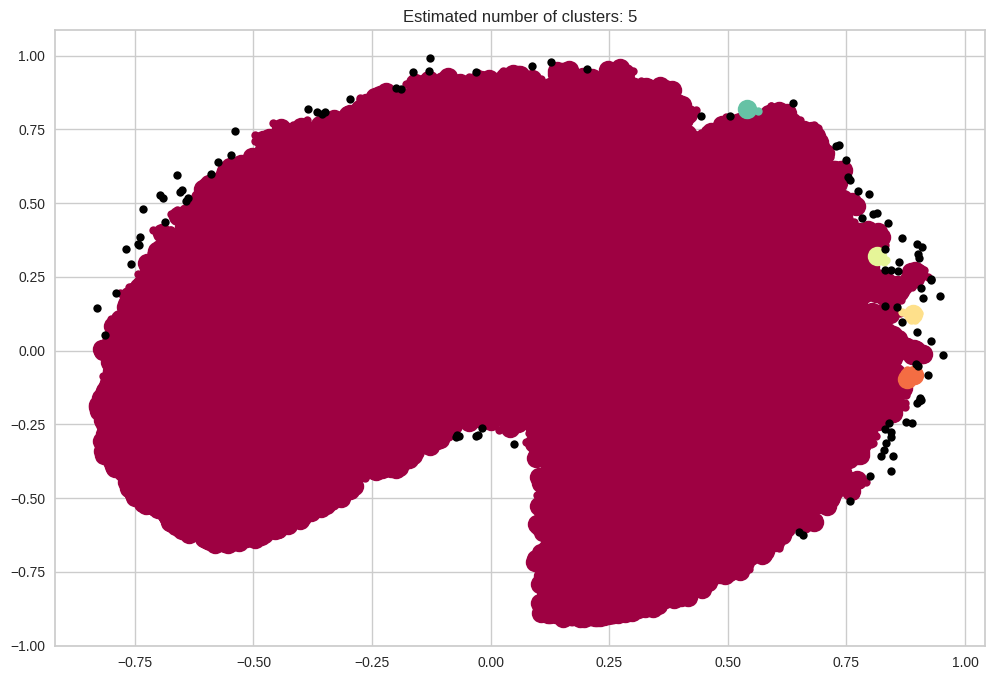

In [72]:
# Representation des resultats
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## DBSCAN clustering de la donnée brute (sans PCA)

In [73]:
# Tableau Numpy de toutes les étiquettes de clusters attribuées à chaque point de données
db_default = DBSCAN(eps = 0.405, min_samples = 5).fit(X_normalized)
labels = db_default.labels_

In [74]:
np.unique(labels)

array([-1,  0,  1])

In [75]:
# Etape 5: Construction du modèle final
from sklearn import metrics
labels_true = data.index
# Tableau Numpy de toutes les étiquettes de clusters attribuées à chaque point de données
db_default = DBSCAN(eps = 0.405, min_samples = 5).fit(X_normalized)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Nombre de clusters dans les étiquettes, en ignorant le bruit si présent.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 185
Homogeneity: 0.0013
Completeness: 1.0000
V-measure: 0.0026
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: -0.0000
Silhouette Coefficient: -0.3154


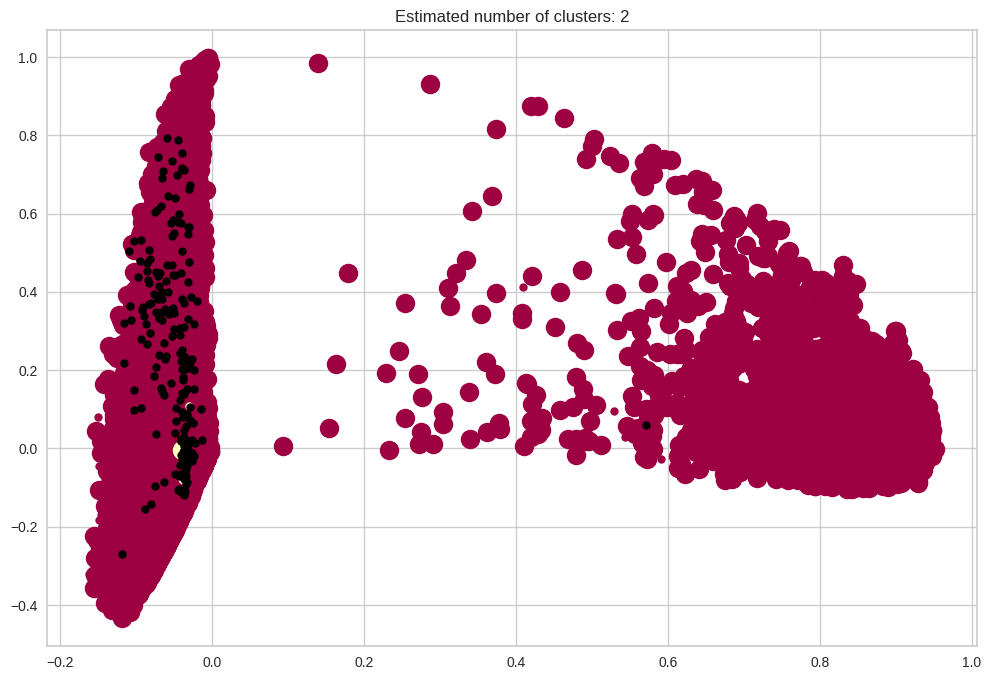

In [76]:
# Plot
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_normalized[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_normalized[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Analyse des résultats de l'algorithme de clustering retenu

**Note**  
 * On a partitionné notre data set clients en utilisant différents algorithmes dont K-Means,K-Prototypes, Hierarchiqual agglomerative clustering selon Ward, et DBSCAN.
 * Les résultas malgré certainnes imperfections tournent autour de 5 a 6 clusters ,mais le plus probants quant au score (silhouette), fit-time,ainsi que son score à l'initialisation  est ***le modele K-Means dont on garde les resultats.***


In [100]:
# Representation graphique des caractéristiques des clusters retenus
plot_radars(data=df_scaled_clusters_bis,
            group="kmeans_label")

## Interprétation des clusters à partir du graphique précedent

* **Groupe 1** (Cluster 0): Clients proches géographiquement  avec de courts délais de livraison, commandant principalement en début d'année pour des montants faibles. Ils paient avec 1 type de moyen de paiement et avec un nombre faible d'échéances. Les avis de ces clients sont très bons.


* Groupe 2 (Cluster 1): Clients de fin d'année. Ils règlent avec plusieurs moyens de paiement pour des montants faibles. Ces clients sont géographiquement peu éloignés(distance haverstine faible) et les délais de livraison sont courts. Les avis de ces clients sont également très bons.

* Groupe 3  (Cluster 3): Regroupe les clients qui utilisent plusieurs moyens de paiement et un nombre important d'échéances. Ils ont tendence à espacer les délais entre 2 commandes. Les avis de ces clients sont également très bons.

* Groupe 4 (Cluster 2): Ce sont des clients mécontents (les avis sont mauvais). Les délais de livraison sont très importants et les frais de port élevés en raison de l'éloignement géographique. Ce sont cependant les clients qui ont le plus dépensé et ont acheté un grand nombre d'articles. En revanche, le nombre de commandes passées sur le site est moyen.

* Groupe 5 (Cluster 4): Ces clients ont passé un nombre important de commandes et sont satisfaits. ils paient comptant pour un montant moyen de commande. Ils sont géographiquement proches.
